<a href="https://colab.research.google.com/github/Jessicaus/Analysis-of-AP-CS-test-cross-time/blob/main/Analysis%20of%20AP%20CS%20test%20cross%20time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving historical.csv to historical.csv
Saving pass_06_13.csv to pass_06_13.csv
Saving pass_12_13.csv to pass_12_13.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
dfall = pd.read_csv("historical.csv",index_col="state")
dfall

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Pop
state,,,,,,,,,,,,,,,,,
California,890,1981,2237,2664,2479,2396,2103,2095,2224,2151,2135,2193,2793,3101,3920,4964,38041430
Texas,825,1266,1743,2110,2191,1980,2099,2167,2411,2593,2951,3224,3392,3597,3614,3979,26059203
New York,802,1293,1429,1594,1677,1369,1366,1186,1141,1175,1050,1132,1460,1334,1821,1858,19570261
Virginia,365,733,677,838,636,640,591,535,646,888,859,913,1177,1203,1430,1655,8185867
Maryland,119,337,480,571,599,623,673,725,752,808,895,1038,1352,1330,1473,1629,5884563
New Jersey,387,654,775,912,889,779,847,783,740,747,696,701,942,1120,1235,1582,8864590
Illinois,193,381,385,412,426,439,422,444,460,465,473,575,761,929,1199,1559,12875255
Florida,487,755,744,835,845,825,894,873,979,865,944,912,1009,1017,1310,1521,19317568
Georgia,148,571,439,461,416,458,389,388,427,422,585,583,692,884,1037,1261,9919945


In [5]:
df2=pd.read_csv("pass_12_13.csv")
df2

,year,state,schools,total,passed,female,female_passed,black,black_passed,black_male,black_male_passed,black_female,black_female_passed,hispanic,hispanic_passed,hispanic_female,hispanic_female_passed,black_in_state,hispanic_in_state
0,2012,Alabama,14,97,61,12,10,9,5,8.0,4,1,*,2,*,0,0,NaN,NaN
1,2012,Alaska,2,13,12,0,0,0,0,0.0,0,0,0,1,*,0,0,NaN,NaN
2,2012,Arizona,21,132,86,23,15,1,*,1.0,*,0,0,21,8,4,*,NaN,NaN
3,2012,Arkansas,11,146,42,26,4,3,*,2.0,*,1,*,18,1,2,*,NaN,NaN
4,2012,California,192,3920,2862,833,553,45,22,30.0,18,15,4,314,136,75,22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2013,Alaska,2,21,21,2,*,0,0,NaN,NaN,0,0,0,0,0,0,4.30,5.5
97,2013,Montana,0,11,6,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0.67,2.9
98,2013,North Dakota,1,9,6,2,*,0,0,NaN,NaN,0,0,0,0,0,0,1.08,2.0
99,2013,Mississippi,2,1,*,0,0,0,0,NaN,NaN,0,0,0,0,0,0,37.30,2.7


In [6]:
# Part ONE: dfall

# Pre-processing: Delete unnecessary rows/columns
dfall=dfall.drop(["Pop"],axis=1)
# dfall.info() Get info from dataset to see strange values

In [7]:
# Find if null values
# Replace weird value by 0
def convert_to_int(x):
  try:
    return int(x)
  except ValueError:
    return 0
    
dfall["1999"]=dfall["1999"].apply(convert_to_int)
dfall.describe()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,120.294118,231.156863,258.019608,299.117647,296.921569,277.000000,270.117647,263.27451,276.627451,284.882353,294.392157,314.921569,378.137255,414.490196,485.921569,579.509804
std,209.816996,386.616108,446.989865,527.393616,516.397050,478.792439,465.261374,458.16565,490.588339,506.196865,537.558930,577.261045,664.874425,709.767437,811.841754,957.573295
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.00000,1.000000,0.000000,1.000000,1.000000,5.000000,0.000000,1.000000,0.000000
25%,11.500000,22.500000,25.500000,26.500000,34.500000,24.000000,25.000000,31.00000,33.500000,28.500000,26.500000,24.000000,30.500000,45.000000,61.000000,59.000000
50%,38.000000,58.000000,69.000000,77.000000,81.000000,69.000000,64.000000,73.00000,87.000000,80.000000,76.000000,78.000000,90.000000,113.000000,132.000000,174.000000
75%,133.000000,269.500000,316.000000,342.500000,349.000000,337.500000,329.500000,297.00000,293.000000,274.000000,304.500000,327.500000,389.000000,425.500000,489.000000,637.000000
max,890.000000,1981.000000,2237.000000,2664.000000,2479.000000,2396.000000,2103.000000,2167.00000,2411.000000,2593.000000,2951.000000,3224.000000,3392.000000,3597.000000,3920.000000,4964.000000


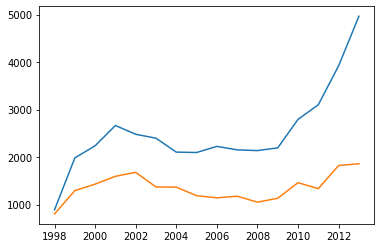

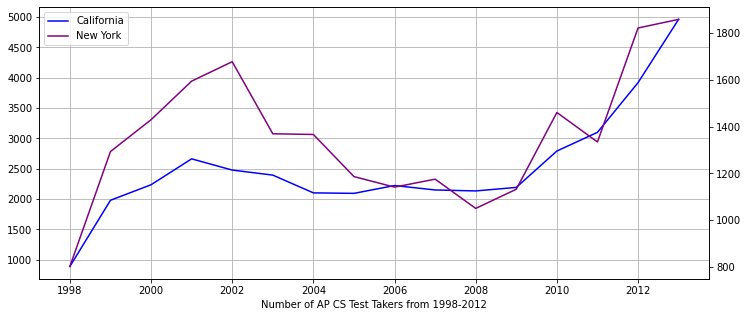

In [8]:
# Print data for California using iloc
# dfall.loc["California"]

# Plot data for California over time
s1=pd.Series(dfall.loc["California"])
s2=pd.Series(dfall.loc["New York"])
s1.plot()
s2.plot()

plt.figure(figsize=(12,5))
plt.xlabel("Number of AP CS Test Takers from 1998-2012")

ax1 = s1.plot(color='blue', grid=True, label='California')
# TODO: add a second axis to view data for different state
ax2 = s2.plot(color='purple', grid=True, label="New York", secondary_y=True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()


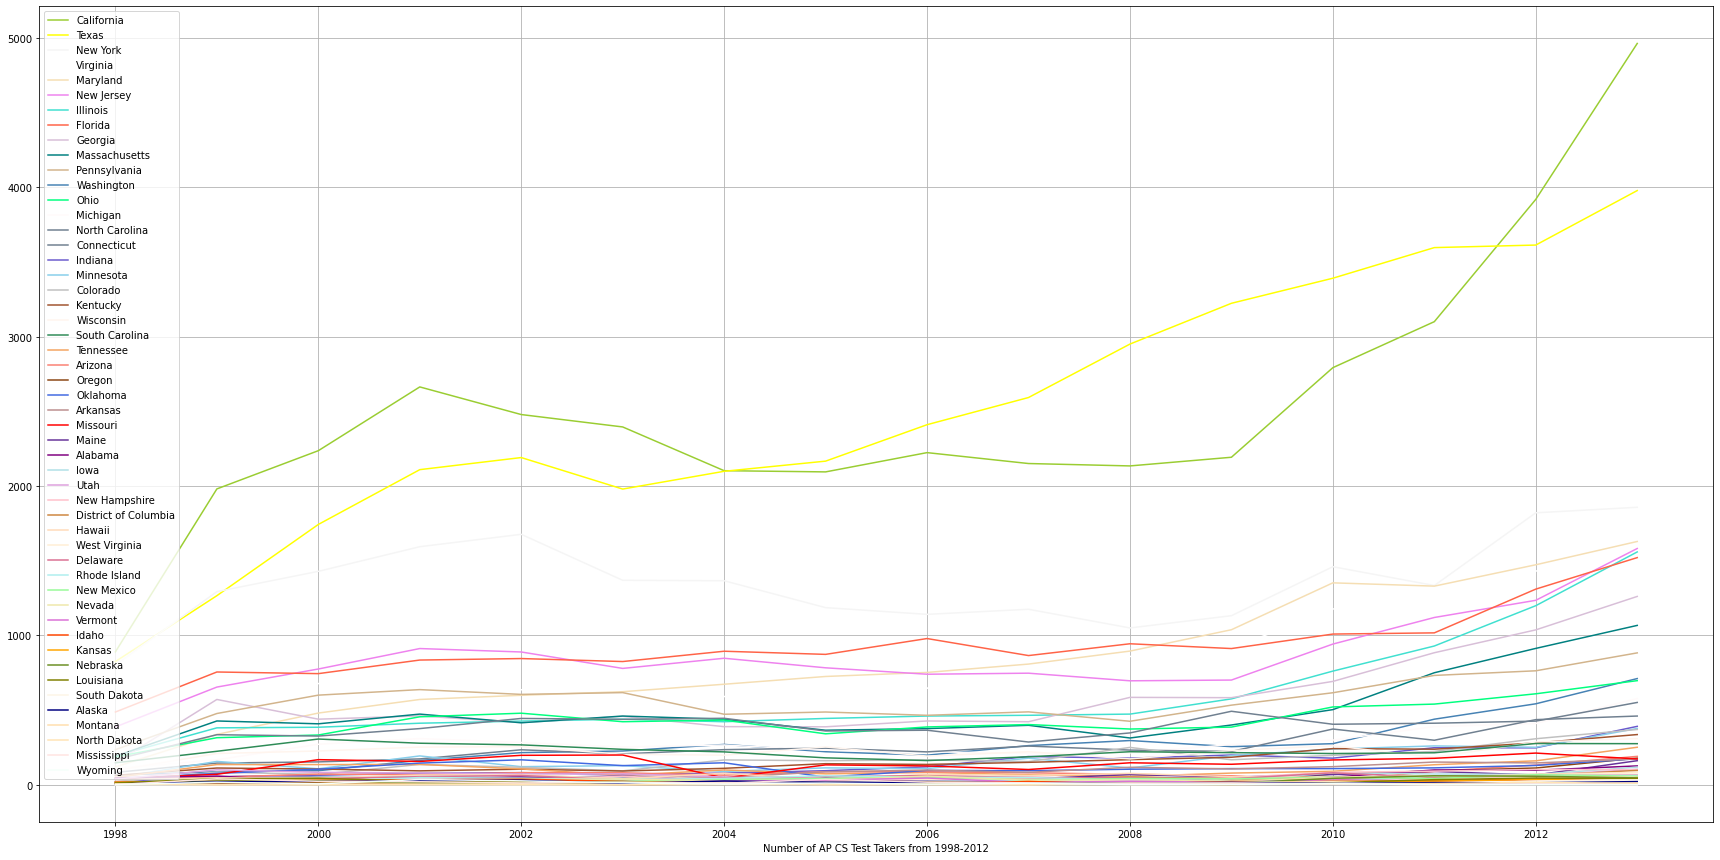

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [17]:
plt.figure(figsize=(30,15))
plt.xlabel("Number of AP CS Test Takers from 1998-2012")

#How to have different colors for all of them?
colors=mcolors.CSS4_COLORS #css is what gives style to websites
scolor=list(colors.keys())
scolor=sorted(scolor,reverse=True)
for i in range(len(dfall)):
  s=pd.Series(dfall.iloc[i])
  s.plot(grid=True,color=scolor[i])

plt.legend(loc='best')
plt.show()
#print(colors)

In [10]:
#Part TWO: df1
df1=pd.read_csv("pass_06_13.csv",index_col="state")
dfNational=df1.iloc[0:8]
df1=df1.drop(["National Data - CS A ","National Data - Calculus AB "],axis=0)

print(dfNational)
print(df1)

                       year  schools_offering  ...     male  male_passed
state                                          ...                      
National Data - CS A   2006               NaN  ...      NaN          NaN
National Data - CS A   2007               NaN  ...      NaN          NaN
National Data - CS A   2008            1778.0  ...      NaN          NaN
National Data - CS A   2009            1879.0  ...      NaN          NaN
National Data - CS A   2010            2048.0  ...      NaN          NaN
National Data - CS A   2011            1972.0  ...      NaN          NaN
National Data - CS A   2012            2103.0  ...      NaN          NaN
National Data - CS A   2013            2253.0  ...  24070.0      16355.0

[8 rows x 28 columns]
          year  schools_offering  total  ...  asian_female  male male_passed
state                                    ...                                
Alabama   2006               NaN     20  ...           NaN   NaN         NaN
Alabama   2007  

In [11]:
dfNational.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, National Data - CS A  to National Data - CS A 
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    8 non-null      int64  
 1   schools_offering        6 non-null      float64
 2   total                   8 non-null      int64  
 3   passed                  8 non-null      int64  
 4   female                  8 non-null      int64  
 5   female_passed           8 non-null      object 
 6   black                   8 non-null      int64  
 7   black_passed            8 non-null      object 
 8   black_male              8 non-null      int64  
 9   black_male_passed       8 non-null      object 
 10  black_female            8 non-null      int64  
 11  black_female_passed     8 non-null      object 
 12  hispanic                8 non-null      int64  
 13  hispanic_passed         8 non-null      object 
 14  hispanic_fe

In [12]:
def convert_to_int(x):
  try:
    return int(x)
  except ValueError:
    return 0

dfNationalcol=dfNational.columns.tolist()
df1col=df1.columns.tolist()
for i in range(len(dfNationalcol)):
  dfNational[dfNationalcol[i]]=dfNational[dfNationalcol[i]].apply(convert_to_int)
  df1[df1col[i]]=df1[df1col[i]].apply(convert_to_int)
dfNational.info()
df1.info()



<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, National Data - CS A  to National Data - CS A 
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    8 non-null      int64
 1   schools_offering        8 non-null      int64
 2   total                   8 non-null      int64
 3   passed                  8 non-null      int64
 4   female                  8 non-null      int64
 5   female_passed           8 non-null      int64
 6   black                   8 non-null      int64
 7   black_passed            8 non-null      int64
 8   black_male              8 non-null      int64
 9   black_male_passed       8 non-null      int64
 10  black_female            8 non-null      int64
 11  black_female_passed     8 non-null      int64
 12  hispanic                8 non-null      int64
 13  hispanic_passed         8 non-null      int64
 14  hispanic_female         8 non-null      int